In [1]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_mean_std(prob, roi):
    expectation = []
    for i in range(len(prob)):
        expectation.append(prob[i]*roi[i])
    expectation = np.array(expectation)
    mean = expectation.mean()
    std = expectation.std()
    return (mean, std)

In [3]:
# Given Data
# Caution! Index starts from zero
prob_project = []
roi_project = []
prob_project.append([0.8, 0.5, 0.2])
prob_project.append([0.8, 0.5, 0.2])
prob_project.append([0.8, 0.5, 0.2])
prob_project.append([0.8, 0.5, 0.2])
prob_project.append([0.8, 0.5, 0.2])
prob_project.append([0.8, 0.5, 0.2])
prob_project.append([0.8, 0.5, 0.2])

roi_project.append([8, 18, 24])
roi_project.append([2, 20, 30])
roi_project.append([12,14, 18])
roi_project.append([15,20, 24])
roi_project.append([8, 15, 20])
roi_project.append([6, 18, 25])
roi_project.append([9, 15, 20])

# Get mean and std
mean_project = []
std_project = []
for i in range(len(prob_project)):
    mean, std = get_mean_std(prob_project[i], roi_project[i])
    mean_project.append(mean)
    std_project.append(std)

In [4]:
parameters_project = []
fitted_pdf = []
x = np.linspace(-20,20,1000)

for i in range(len(mean_project)):
    # Generate an array of 200 random sample from a normal dist
    random_sample = norm.rvs(loc=mean_project[i],\
                             scale=std_project[i], size=1000)
    # Distribution fitting
    # norm.fit(data) returns a list of two parameters 
    # (mean, parameters[0] and std, parameters[1]) 
    # via a MLE approach to data, which should be in array form.
    parameters = norm.fit(random_sample)
    fitted_pdf.append(norm.pdf(x,loc = parameters[0],\
                               scale = parameters[1]))
    parameters_project.append(parameters)
    

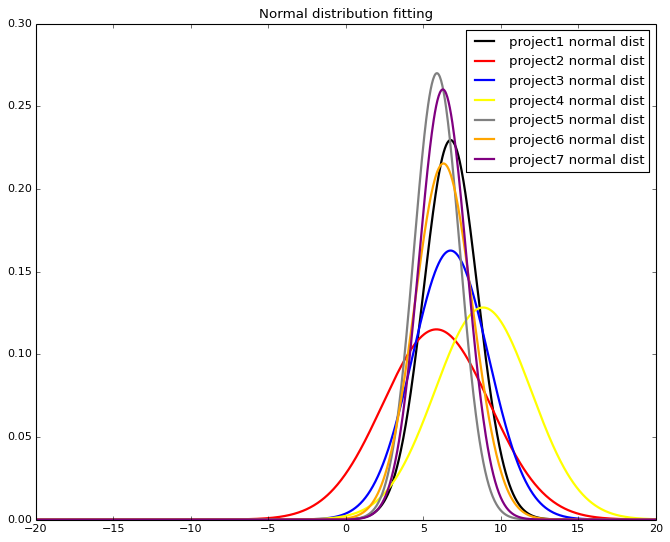

In [5]:
# Type help(plot) for a ton of information on pyplot
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x,fitted_pdf[0],"black",label="project1 normal dist", linewidth=2)
plt.plot(x,fitted_pdf[1],"red",label="project2 normal dist", linewidth=2)
plt.plot(x,fitted_pdf[2],"blue",label="project3 normal dist", linewidth=2)
plt.plot(x,fitted_pdf[3],"yellow",label="project4 normal dist", linewidth=2)
plt.plot(x,fitted_pdf[4],"grey",label="project5 normal dist", linewidth=2)
plt.plot(x,fitted_pdf[5],"orange",label="project6 normal dist", linewidth=2)
plt.plot(x,fitted_pdf[6],"purple",label="project7 normal dist", linewidth=2)
plt.title("Normal distribution fitting")

# insert a legend in the plot (using label)
plt.legend()

In [6]:
for i in range(len(parameters_project)):
    dist = norm(parameters_project[i][0], parameters_project[i][1])
    less_than_18 = dist.cdf(18)
    between_18_and_22 = dist.cdf(22) - less_than_18
    more_than_22 = 1. - dist.cdf(22)
    
    print("[Project {0:d}]".format(i+1))
    print("P(X<=18) = {0:f}".format(less_than_18))
    print("P(18<X<22) = {0:f}".format(between_18_and_22))
    print("P(X>=22) = {0:f}".format(more_than_22))
    print("")
    

[Project 1]
P(X<=18) = 1.000000
P(18<X<22) = 0.000000
P(X>=22) = 0.000000

[Project 2]
P(X<=18) = 0.999773
P(18<X<22) = 0.000225
P(X>=22) = 0.000002

[Project 3]
P(X<=18) = 0.999998
P(18<X<22) = 0.000002
P(X>=22) = 0.000000

[Project 4]
P(X<=18) = 0.998367
P(18<X<22) = 0.001622
P(X>=22) = 0.000012

[Project 5]
P(X<=18) = 1.000000
P(18<X<22) = 0.000000
P(X>=22) = 0.000000

[Project 6]
P(X<=18) = 1.000000
P(18<X<22) = 0.000000
P(X>=22) = 0.000000

[Project 7]
P(X<=18) = 1.000000
P(18<X<22) = 0.000000
P(X>=22) = 0.000000



# Conclusion
The given data are not normally distributed, so MLE on Gaussian Distribution is not proper as an evaluation function to resolve this issue.